In [38]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [243]:
df=pd.read_csv('all_clean.csv')

In [244]:
df.describe()

,Unnamed: 0,kod,price,year,clock,travel,selfweight,fullweight,gearsize,power
count,26896.000000,2.689600e+04,2.661000e+04,26896.000000,26896.000000,26896.000000,26896.000000,26896.000000,26870.000000,26884.000000
mean,2868.266657,1.419641e+07,1.659672e+06,2006.851651,173375.701443,5.109645,1293.636377,1827.289820,1626.730368,80.251785
std,2237.494598,5.185229e+05,1.511358e+06,5.687160,79583.031968,0.667345,264.577236,337.025375,395.678113,26.381019
min,0.000000,3.633975e+06,3.500000e+04,1960.000000,1.000000,2.000000,680.000000,1030.000000,14.000000,25.000000
25%,1036.000000,1.417958e+07,6.980000e+05,2003.000000,124000.000000,5.000000,1088.000000,1570.000000,1364.000000,64.000000
50%,2208.500000,1.435873e+07,1.199000e+06,2007.000000,172584.000000,5.000000,1280.000000,1795.000000,1596.000000,77.000000
75%,4357.000000,1.442679e+07,2.150000e+06,2011.000000,222600.000000,5.000000,1458.000000,2025.000000,1896.000000,92.000000
max,8637.000000,1.451344e+07,1.690000e+07,2019.000000,499000.000000,8.000000,3000.000000,3500.000000,7536.000000,415.000000


In [245]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,kod,name,price,year,status,clock,look,airc,travel,selfweight,fullweight,fuel,gearsize,power,gearset,run,paper,name0
0,14250805,CORDOBA,220000.0,2001.0,Normál,201793.0,Sedan,Nincs,5.0,1045.0,1505.0,Benzin,1598.0,55.0,Soros,Első kerék,Érvényes magyar okmányokkal,SEAT
1,14408818,LEON,299000.0,2000.0,Normál,187000.0,Ferdehátú,Manuális klíma,5.0,1135.0,1680.0,Benzin,1390.0,55.0,Soros,Első kerék,Érvényes magyar okmányokkal,SEAT
2,14371085,IBIZA,439000.0,2002.0,Normál,133000.0,Ferdehátú,Manuális klíma,5.0,1028.0,1488.0,Benzin,1390.0,55.0,Soros,Első kerék,Érvényes magyar okmányokkal,SEAT
3,14371221,LEON,500000.0,2004.0,Normál,206000.0,Ferdehátú,Digitális klíma,5.0,1150.0,1660.0,Benzin,1598.0,77.0,Soros,Első kerék,Érvényes magyar okmányokkal,SEAT
4,14109191,CORDOBA,790000.0,2004.0,Megkímélt,236000.0,Sedan,Manuális klíma,5.0,1090.0,1585.0,Benzin,1390.0,63.0,Soros Álló,Első kerék,Érvényes magyar okmányokkal,SEAT


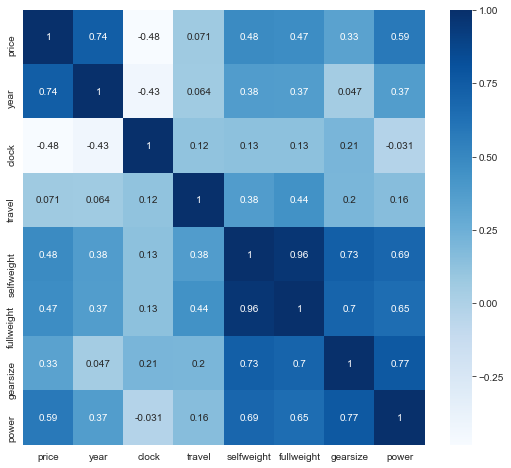

In [246]:
df_num=df.select_dtypes(include=['float64'])

plt.rcParams['figure.figsize'] = (9.0, 8.0)
fig.set_size_inches(8, 8)
sns.heatmap(df_num.corr(), annot = True,cmap = "Blues")


In [247]:
correlation = df_num.corr()
print(correlation['price'].sort_values(ascending=False))


price         1.000000
year          0.738274
power         0.585782
selfweight    0.483159
fullweight    0.467093
gearsize      0.334920
travel        0.070735
clock        -0.483294
Name: price, dtype: float64


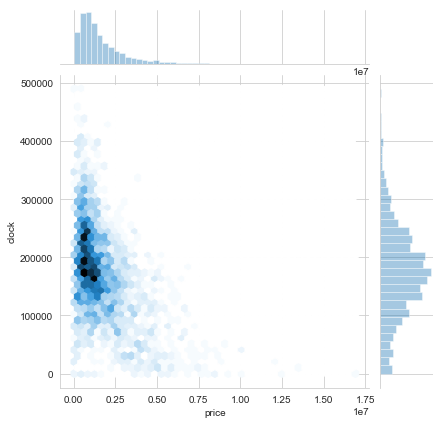

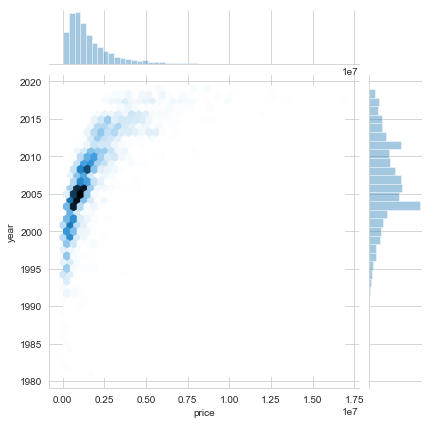

In [248]:
fig.set_size_inches(8, 8)
sns.set_style("whitegrid")

df1 = df[df.index % 10 == 0]

sns.jointplot(x='price', y='clock', data=df1, kind="hex")

sns.jointplot(x='price', y='year', data=df1, kind='hex')
plt.show()

In [249]:
def cat_reducer(df,field, count):
    reduce_dict = df.groupby(field)['kod'].nunique().to_dict()
    l = []
    l.append(reduce_dict)
    reduce_df = pd.DataFrame(l)
    reduce_df = reduce_df.T
    reduce_df.sort_values(by = 0, ascending = False)
    
    #Kategóriák listába rendezése
    flist=reduce_df[reduce_df[0] < count].index.tolist()
    #Csere egyébre
    
    out = df[field] = df[field].replace(flist, 'Egyéb')
    dd = df.groupby(field)['kod'].nunique().to_dict()
    l = []
    l.append(dd)
    
    return out

cat_reducer(df,'look',200)
cat_reducer(df,'fuel',300)
cat_reducer(df,'gearset',300)
cat_reducer(df,'airc',300)
print('OK')

OK


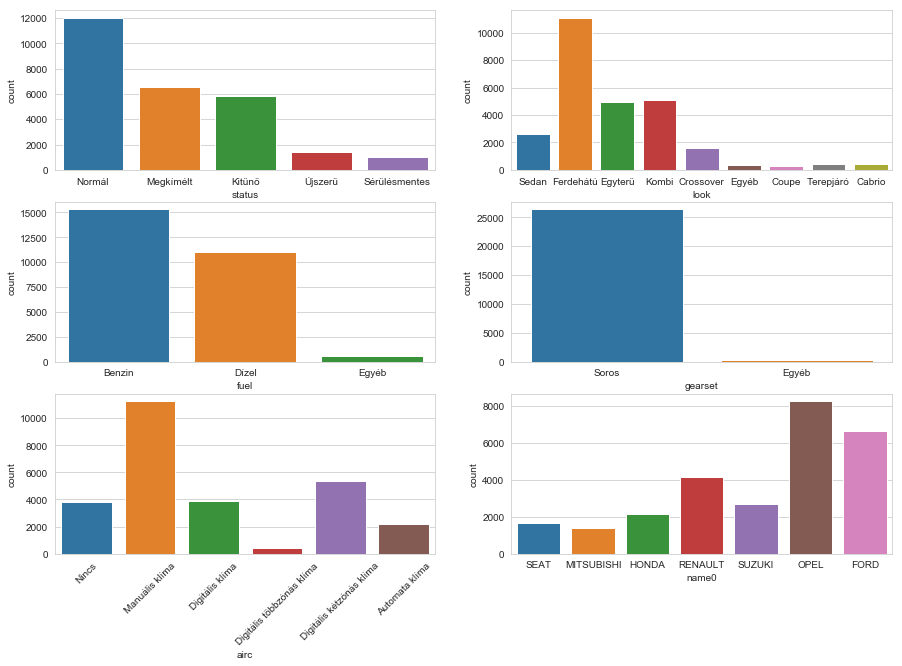

In [250]:
fig, ax =plt.subplots(3,2)
fig.set_size_inches(15, 10)



bar1=sns.countplot(df['status'], ax=ax[0,0])

bar2=sns.countplot(x='look', data=df, ax=ax[0,1])
#bar2.set_xticklabels(bar2.get_xticklabels(), rotation=45)
bar3=sns.countplot(x='fuel', data=df, ax=ax[1,0])
bar4=sns.countplot(x='gearset', data=df, ax=ax[1,1])

bar5=sns.countplot(x='airc', data=df, ax=ax[2,0])
bar5.set_xticklabels(bar5.get_xticklabels(), rotation=45)

bar5=sns.countplot(x='name0', data=df, ax=ax[2,1])


    

plt.show()

c:\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


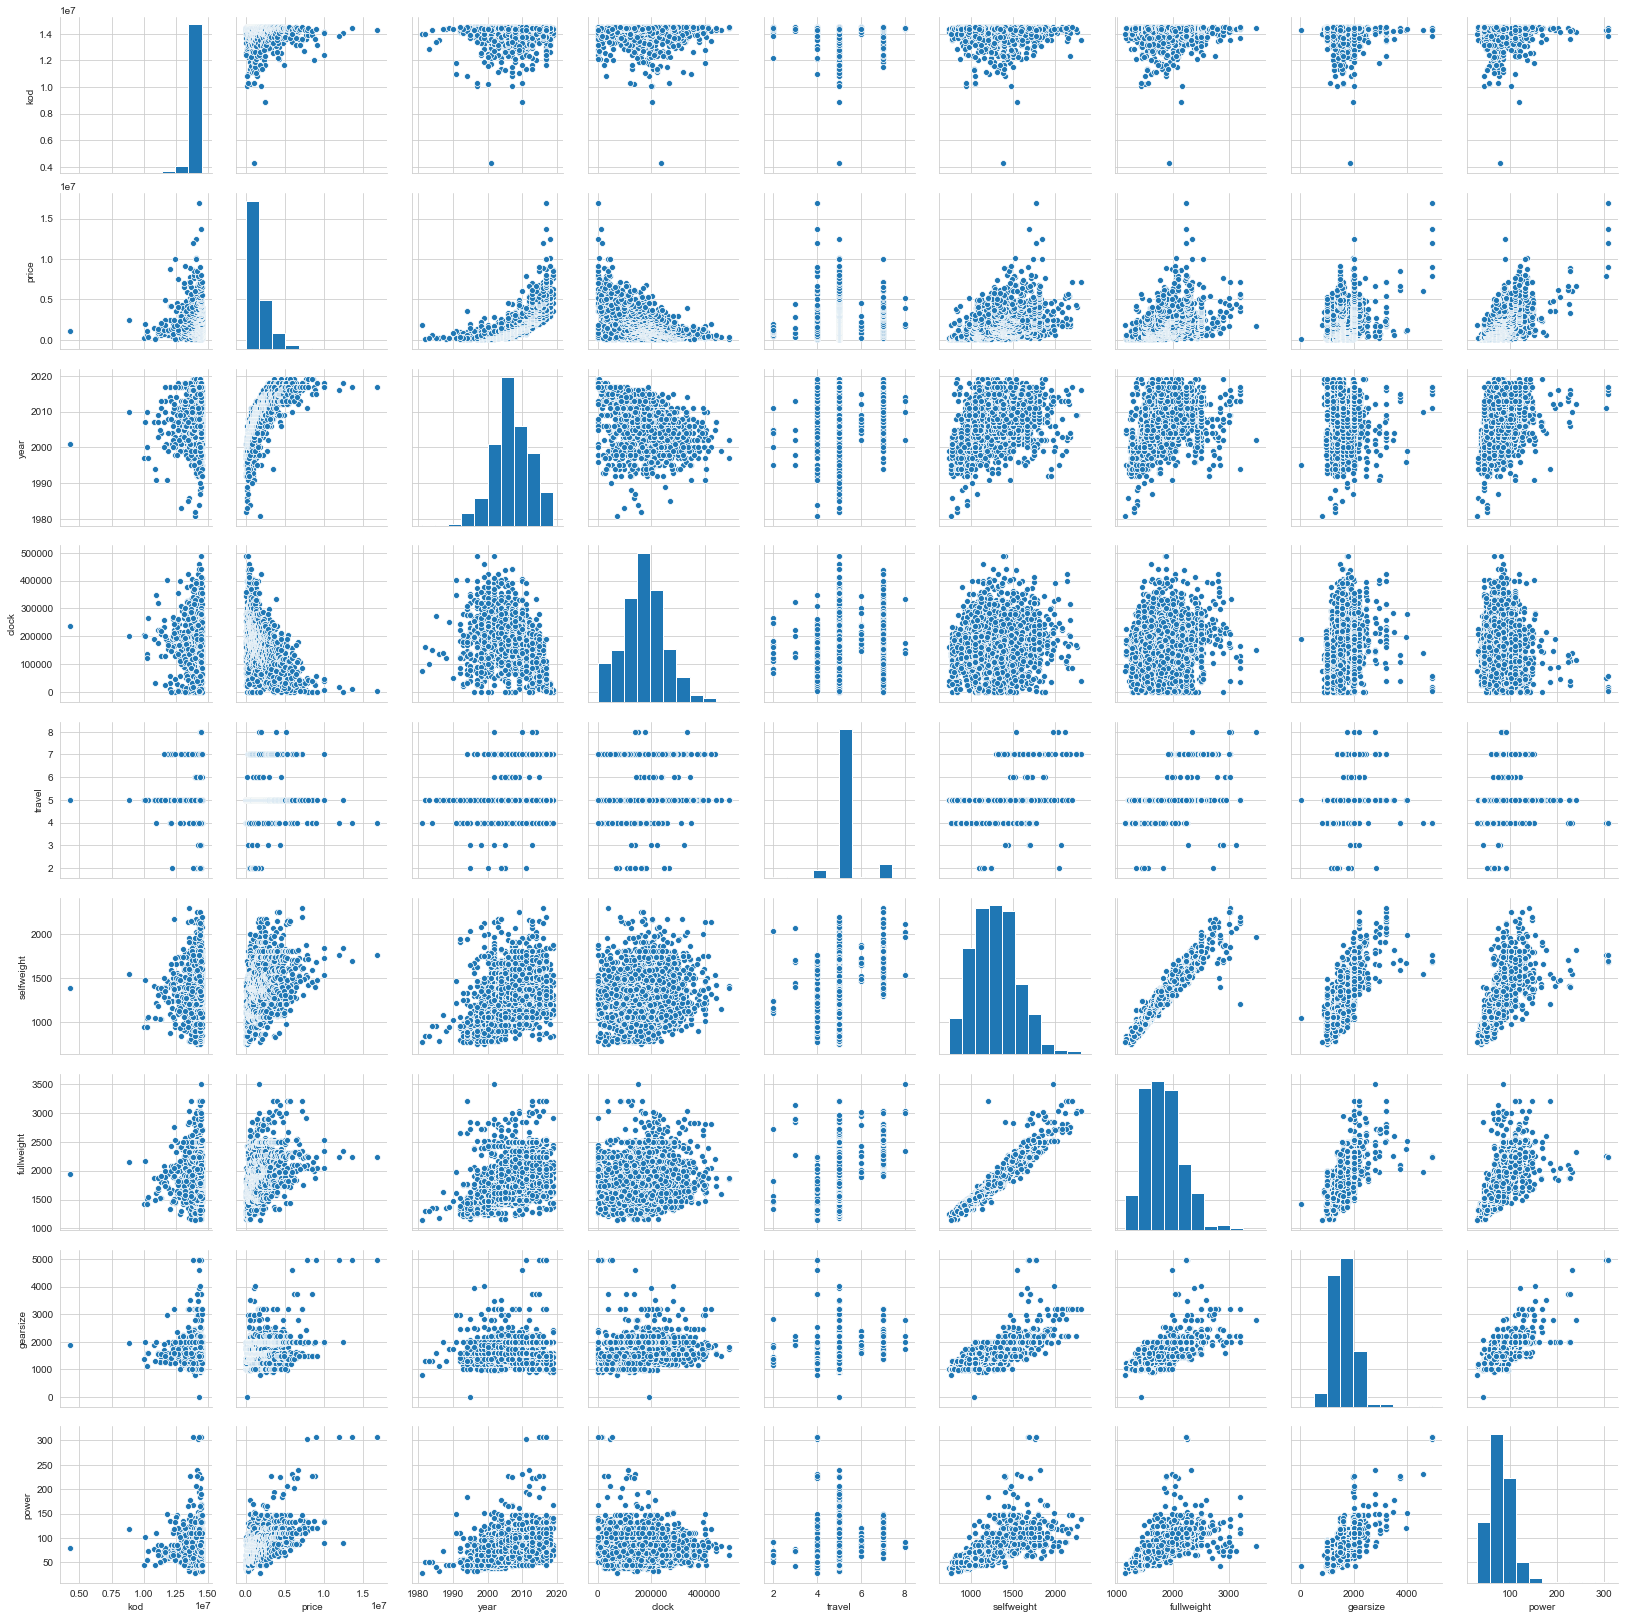

In [251]:
sns.pairplot(df1)